In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
import random
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
nltk.download('wordnet')
url="https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv"
data=pd.read_csv(url, sep='\t')
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


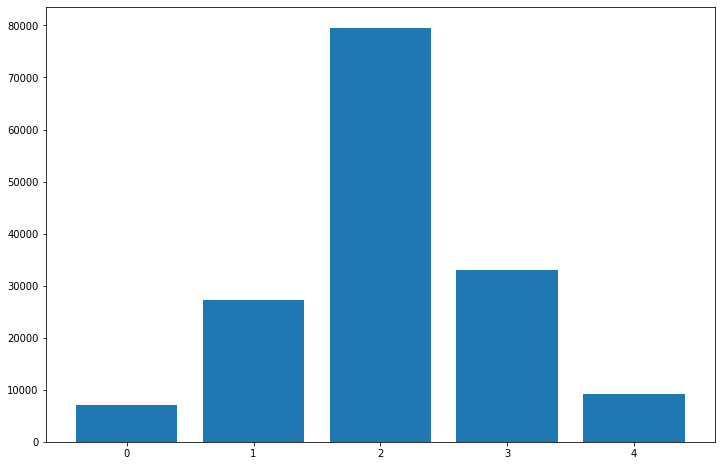

In [4]:
import matplotlib.pyplot as plt

dist = data.groupby(["Sentiment"]).size()
#dist = dist / dist.sum()
fig, ax = plt.subplots(figsize=(12,8))
plt.bar(dist.keys(), dist.values);

In [5]:
X = data['Phrase'].to_numpy()
y = data['Sentiment'].to_numpy()
msg_train,msg_test,label_train,label_test = train_test_split(X,y, test_size=0.3, random_state=2003)
xpd = pd.DataFrame(msg_train, columns=['text'])
ypd = pd.DataFrame(label_train, columns=['sentiment'])
print(xpd.shape, "::", ypd.shape)
#all_data = pd.DataFrame([xpd, data['Sentiment']], columns=['text', 'sentiment'])
all_data = pd.concat([xpd, ypd], axis=1)
#all_data.head()

(109242, 1) :: (109242, 1)


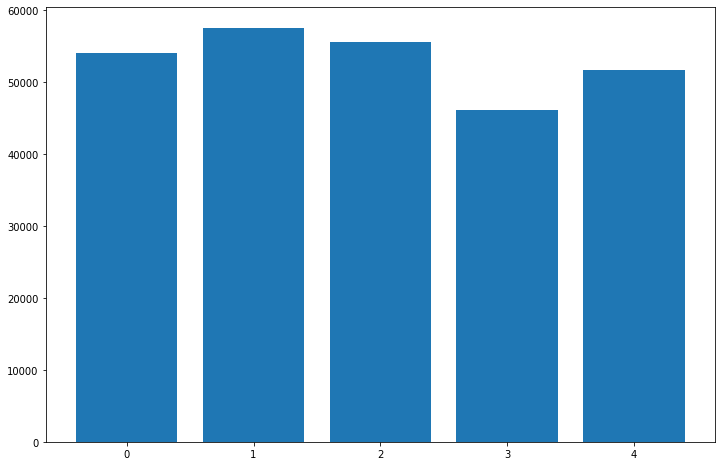

In [6]:
sent_0 = all_data[all_data['sentiment']==0]
sent_1 = all_data[all_data['sentiment']==1]
sent_2 = all_data[all_data['sentiment']==2]
sent_3 = all_data[all_data['sentiment']==3]
sent_4 = all_data[all_data['sentiment']==4]


all_data = all_data.append([sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0,sent_0])
all_data = all_data.append([sent_1,sent_1])
all_data = all_data.append([sent_3])
all_data = all_data.append([sent_4,sent_4,sent_4,sent_4,sent_4,sent_4,sent_4])

dist = all_data.groupby(["sentiment"]).size()
#dist = dist / dist.sum()
fig, ax = plt.subplots(figsize=(12,8))
plt.bar(dist.keys(), dist.values);

In [0]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer

def prepro(X):
  stop_words = set(stopwords.words('english'))
  punctuations = """?:!.,;'-`()~/*%^!@"#$_"""
  porter = PorterStemmer()
  lancaster = LancasterStemmer()
  wordnet = WordNetLemmatizer()

  remove_stopwords = True
  useStemming = True
  useLemma = True
  removePuncs = True

  for l in range(len(X)):
    #print(l)
    #label = documents[l][1]
    tempReview = []
    words = nltk.word_tokenize(X[l])
    for w in words:
      newWord = w
      if remove_stopwords and (w in stop_words):
        continue
      if removePuncs and (w in punctuations):
        continue
      if useStemming:
        newWord = porter.stem(newWord)
        #newWord = lancaster.stem(newWord)
      if useLemma:
        newWord = wordnet.lemmatize(newWord)
      tempReview.append(newWord)
    X[l] = (' '.join(tempReview))
  print(X[1])
  return X

In [8]:
msg_train = data['Phrase'].to_numpy()
label_train = data['Sentiment'].to_numpy()
msg_train = prepro(msg_train)
msg_test = prepro(msg_test)

A seri escapad demonstr adag good goo
mani definit


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
vec_length = 4096
#vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 1))
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 1), max_features=4096)
X = vectorizer.fit_transform(msg_train)
Y = all_data['sentiment']
x_train = vectorizer.transform(msg_train)
y_train = label_train
x_test = vectorizer.transform(msg_test)
y_test = label_test
x_train_np = x_train.toarray()
y_train_np = np.array(y_train)
x_test_np = x_test.toarray()
y_test_np = np.array(y_test)

In [11]:
print(x_test_np.reshape(x_test_np.shape[0], x_test_np.shape[1], 1).shape)
x_train_np = x_train_np.reshape(x_train_np.shape[0], x_train_np.shape[1], 1)
x_test_np = x_test_np.reshape(x_test_np.shape[0], x_test_np.shape[1], 1)
from keras.utils import to_categorical
y_train_np = to_categorical(y_train_np)
y_test_np = to_categorical(y_test_np)

(46818, 4096, 1)


Using TensorFlow backend.


In [0]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Dropout, MaxPool1D, Embedding
from keras.activations import relu

In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
num_classes = 5
model = Sequential()
model.add(Conv1D(256, 5, activation='relu', input_shape=x_train_np.shape[1:]))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(256, 5, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(512, 3, activation='relu'))
#model.add(MaxPool1D(pool_size=2))
#model.add(Dropout(0.25))
#model.add(Conv1D(128, 3, activation='relu'))
#model.add(MaxPool1D(pool_size=2))
#model.add(Dropout(0.25))
#model.add(Conv1D(128, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy',f1_m,precision_m, recall_m])
#from keras.callbacks import ModelCheckpoint
#file_path = "best_model.hdf5"
#check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
#                              save_best_only = True, mode = "min")
epochs = 20
batch_size=32
history = model.fit(x_train_np, y_train_np,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test_np, y_test_np))


In [0]:
print(history.history.keys())
plt.plot(history.history['acc'], label='training data')
plt.plot(history.history['val_acc'], label='validation data')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [0]:
model_save_name = '1121117_1dconv_class.h5'
path = F"/content/drive/My Drive/{model_save_name}" 
model.save(path)

In [0]:
print(history.history['val_acc'])

[0.6776487778267497, 0.7159732063496625, 0.7310688413785775, 0.7426084201096604, 0.7505831404212625, 0.7532149741668284, 0.757448793670565, 0.7589891645924074, 0.7605207333941749, 0.7620963127936943, 0.7630733480632627, 0.76437606175672, 0.7634342349653532, 0.7647105422996348, 0.7660572665908442, 0.76437606175672, 0.7618234470871076, 0.768196181642113, 0.7676240438708132, 0.765124241918503]


In [0]:
from keras.models import load_model
model_save_name = '1121117_1dconv_class.h5'
path = F"/content/drive/My Drive/{model_save_name}" 
model2 = load_model(path, custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})
ev = model2.evaluate(x_test_np, y_test_np)